<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1eiu_4-ikHz6_8a0L4c04xZ-4NZFSUYRn" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/coderyug/heart-disease-multiple-models-rfc">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

---
Imports

---

In [65]:
# Common
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Imputing 
from sklearn.impute import SimpleImputer
# Mapping
from sklearn.preprocessing import LabelEncoder
# Spliting
from sklearn.model_selection import train_test_split
# Feature Importance 
from sklearn.ensemble import RandomForestClassifier
# Scaling
from sklearn.preprocessing import StandardScaler
# Dimensionality Reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
# Tuning
from sklearn.model_selection  import GridSearchCV
# Evaluation 
from sklearn.metrics import r2_score, mean_squared_error

---
Data

---

In [ ]:
df = pd.read_csv("diamonds_dataset.csv")
cols = df.columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119307 entries, 0 to 119306
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            119307 non-null  int64  
 1   url           119307 non-null  object 
 2   shape         119307 non-null  object 
 3   price         119307 non-null  int64  
 4   carat         119307 non-null  float64
 5   cut           119307 non-null  object 
 6   color         119307 non-null  object 
 7   clarity       119307 non-null  object 
 8   report        119307 non-null  object 
 9   type          119307 non-null  object 
 10  date_fetched  119307 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 10.0+ MB


In [ ]:
print(f"Cols : {cols}")

Cols : Index(['id', 'url', 'shape', 'price', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched'],
      dtype='object')


---
We can remove "id", "url" and "date_fetched" as they are not relative to the dataset.

---

In [ ]:
Removed_cols = ["id","url","date_fetched"]
for col in Removed_cols:
  df.pop(col)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119307 entries, 0 to 119306
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   shape    119307 non-null  object 
 1   price    119307 non-null  int64  
 2   carat    119307 non-null  float64
 3   cut      119307 non-null  object 
 4   color    119307 non-null  object 
 5   clarity  119307 non-null  object 
 6   report   119307 non-null  object 
 7   type     119307 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ MB


---
$Great!!$, Let's check for null values.

---

In [ ]:
df.isnull().sum()

shape      0
price      0
carat      0
cut        0
color      0
clarity    0
report     0
type       0
dtype: int64

---
Amazing!! There are no null-values.

---

In [ ]:
df.head()

,shape,price,carat,cut,color,clarity,report,type
0,Round,400,0.30,Very Good,J,SI2,GIA,natural
1,Emerald,400,0.31,Ideal,I,SI1,GIA,natural
2,Emerald,400,0.30,Ideal,I,VS2,GIA,natural
3,Round,400,0.30,Ideal,I,SI2,GIA,natural
4,Emerald,400,0.30,Ideal,I,SI1,GIA,natural


---
The "shape", "cut", "clarity", "report", "type" and "color" are categorical values. SO we have to go through encoding(i.e. Mapping).


---

In [ ]:
Cat_cols = ["shape","cut","color","clarity","report","type"]
for i in Cat_cols:
  Le = LabelEncoder()
  df[i] = Le.fit_transform(df[i])

In [ ]:
df.head()

,shape,price,carat,cut,color,clarity,report,type
0,9,400,0.30,4,6,3,1,1
1,2,400,0.31,2,5,2,1,1
2,2,400,0.30,2,5,5,1,1
3,9,400,0.30,2,5,3,1,1
4,2,400,0.30,2,5,2,1,1


---
$EDA$

---

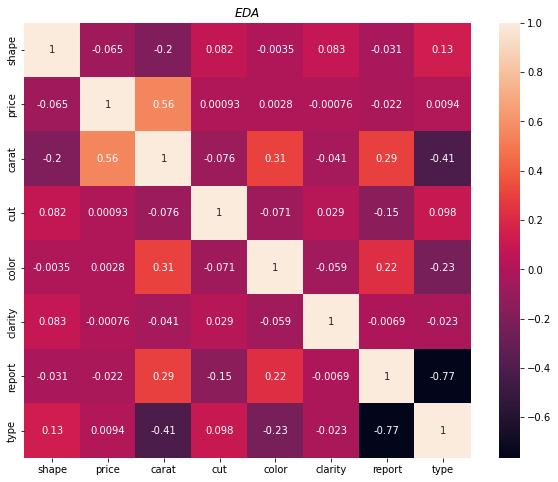

In [ ]:
Corr_ = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr_,annot=True)
plt.title("$EDA$")
plt.show()

---
You can see the `relation` between `carat` and `price`. Which do make `sense`, as `higher the carat higher the price` would be. `report` and `type` have the `strongest relation` among all.

---

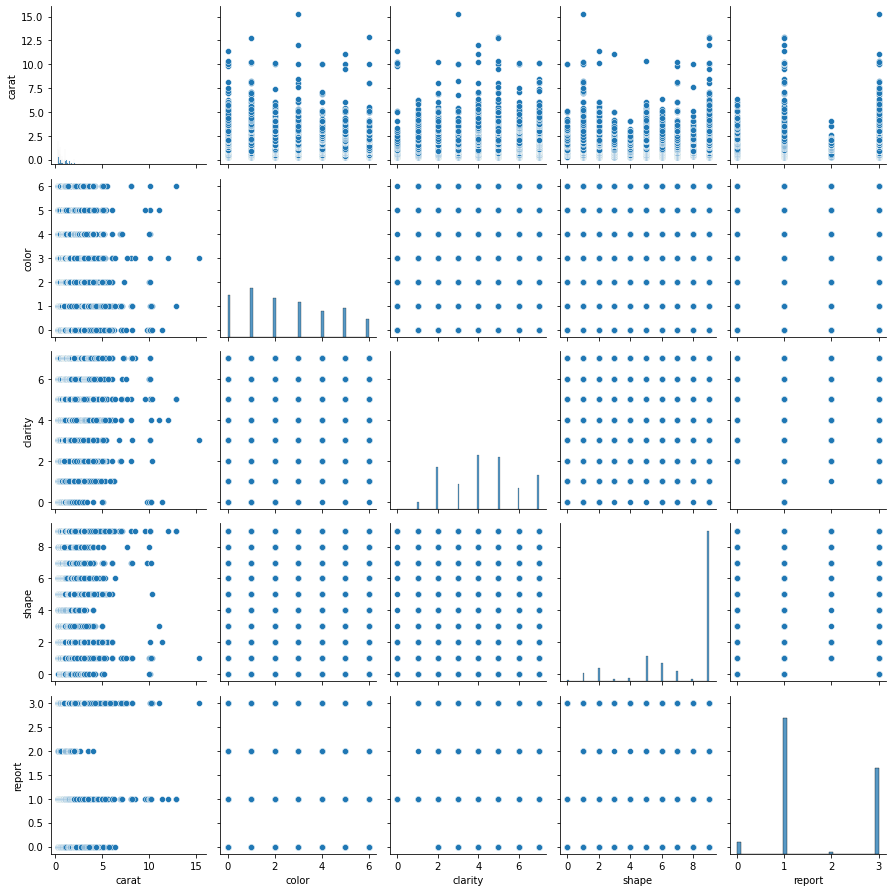

In [ ]:
def EDA_cols_plot(data):
  cols = ['carat','color','clarity','shape','report']
  sns.pairplot(data[cols], height=2.5)
  plt.tight_layout()
  plt.grid()
  plt.show()
EDA_cols_plot(df)

----
The data has no linear properties.

----

$Spliting$


I shrinked the dataset as it was too large for my RAM to handle.

---

In [ ]:
Y_data = df.pop("price")[:60000]
X_data = df[:60000]

In [ ]:
X_data

,shape,carat,cut,color,clarity,report,type
0,9,0.30,4,6,3,1,1
1,2,0.31,2,5,2,1,1
2,2,0.30,2,5,5,1,1
3,9,0.30,2,5,3,1,1
4,2,0.30,2,5,2,1,1
...,...,...,...,...,...,...,...
59995,6,1.01,2,1,2,1,1
59996,7,1.00,2,3,1,1,1
59997,1,1.22,3,5,1,1,1
59998,9,1.03,3,2,3,1,1


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.4)
print(f"X Train : {X_train.shape}")
print(f"Y Train : {Y_train.shape}")
print(f"X Test : {X_test.shape}")
print(f"Y Test : {Y_test.shape}")

X Train : (36000, 7)
Y Train : (36000,)
X Test : (24000, 7)
Y Test : (24000,)


---
$EDA$ on scaled data.

---

In [ ]:
Sc = StandardScaler()
X_data_sc = Sc.fit_transform(X_data)
X_data_sc_eda = X_data_sc.copy()
X_data_eda = pd.DataFrame(X_data_sc_eda)

In [ ]:
X_cols = X_data.columns
X_data_eda.columns = X_cols

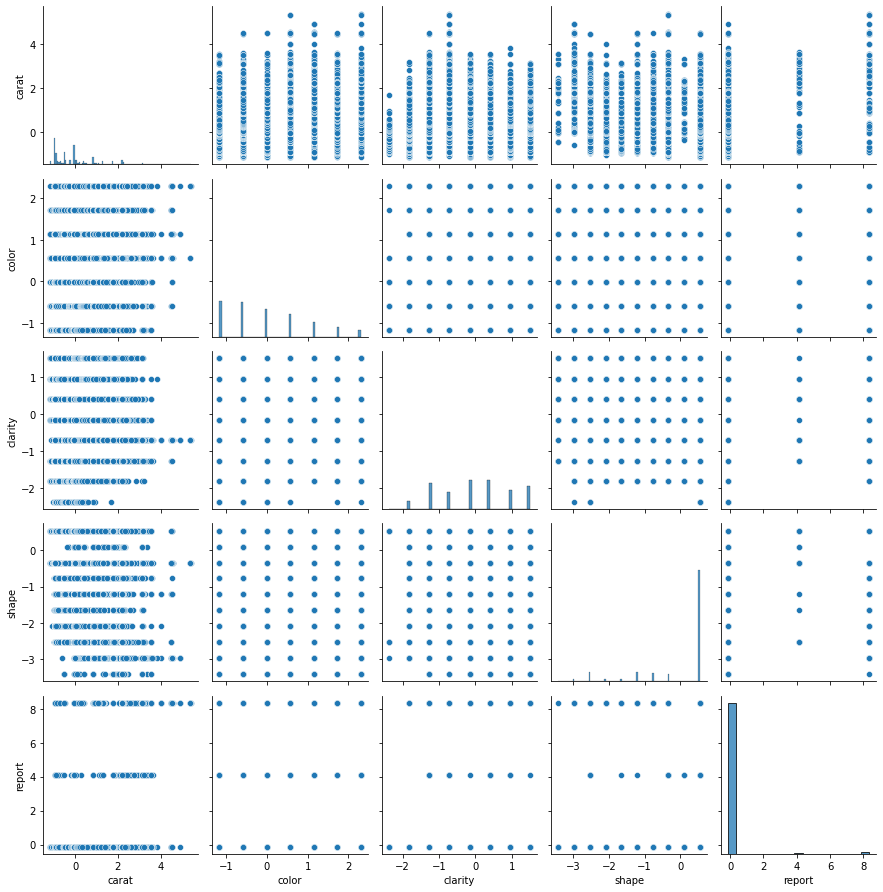

In [ ]:
EDA_cols_plot(X_data_eda)

---
Scaled version is the copy of the normal version just reduced the variable strength(i.e. Values).


---

---
$Feature Importance$

---

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
imp_ = RFC.feature_importances_

In [ ]:
print(f"Feature Importance : {imp_}")

Feature Importance : [0.12308419 0.47802907 0.07597187 0.16123621 0.15573578 0.00594288
 0.        ]


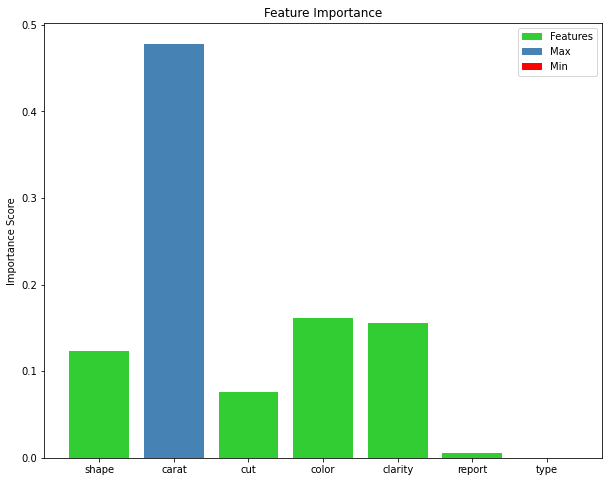

In [ ]:
X_cols = X_data.columns
plt.figure(figsize=(10,8))
plt.bar(X_cols, imp_,color="limegreen",label="Features")
plt.bar(X_cols[np.where(imp_==np.max(imp_))],np.max(imp_),color="steelblue",label="Max")
plt.bar(X_cols[np.where(imp_==np.min(imp_))],np.min(imp_),color="red",label="Min") # Type is just 0 so no display.
plt.legend()
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

---
This means we can remove type and report and we should do that as we have seen that data is non-linear. Removing unnecessary data helps to reduce outliners.


---

In [ ]:
rem_cols = ['report','type']
for i in rem_cols:
  X_data.pop(i)

In [ ]:
X_data.head()

,shape,carat,cut,color,clarity
0,9,0.30,4,6,3
1,2,0.31,2,5,2
2,2,0.30,2,5,5
3,9,0.30,2,5,3
4,2,0.30,2,5,2


---
$Spliting$

---

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.3)
print(f"X Train : {X_train.shape}")
print(f"Y Train : {Y_train.shape}")
print(f"X Test : {X_test.shape}")
print(f"Y Test : {Y_test.shape}")

X Train : (42000, 5)
Y Train : (42000,)
X Test : (18000, 5)
Y Test : (18000,)





---
$Scaler$

Scaling the data helps certain types of models to perform better.

---

In [ ]:
Sc = StandardScaler()
X_data_sc = Sc.fit_transform(X_data)
X_train_sc,X_test_sc,Y_train_sc,Y_test_sc = train_test_split(X_data_sc,Y_data,test_size=0.3)
print(f"X Train : {X_train_sc.shape}")
print(f"Y Train : {Y_train_sc.shape}")
print(f"X Test : {X_test_sc.shape}")
print(f"Y Test : {Y_test_sc.shape}")

X Train : (42000, 5)
Y Train : (42000,)
X Test : (18000, 5)
Y Test : (18000,)


----
$LDA$

In hope that data will become linearly sperable or capable for other regression algorithms.

In [ ]:
lda = LDA()
X_data_lda = lda.fit_transform(X_data,Y_data)
X_data_lda_df = pd.DataFrame(X_data_lda)
X_data_lda_df.columns = X_cols[:-2]

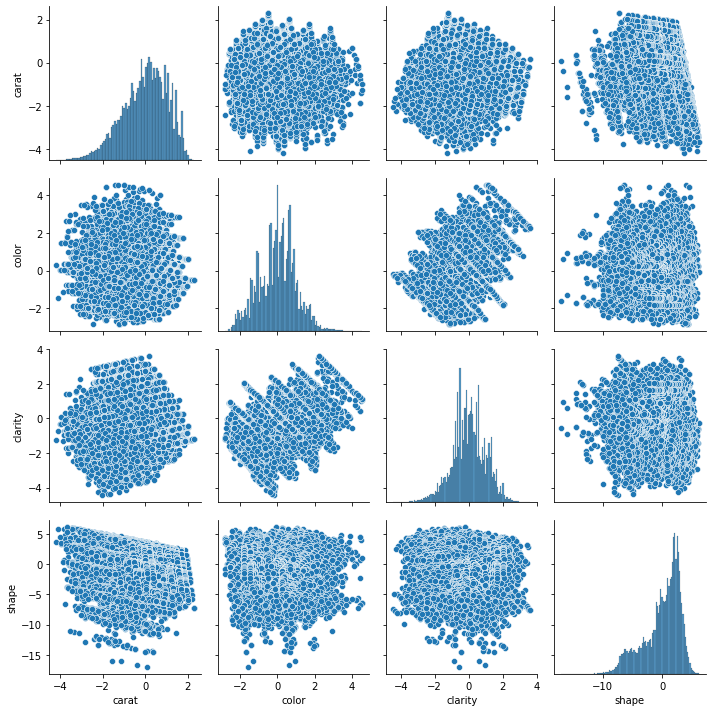

In [ ]:
cols = ['carat','color','clarity','shape']
sns.pairplot(X_data_lda_df[cols], height=2.5)
plt.tight_layout()
plt.grid()
plt.show()

$LDA$ helped to reduce that non-linear sperable data. But it made the data so dense. Now, we can just hope that data in the n-Dimensional plane is seperable by a hyperplane.

----

In [ ]:
X_train_lda,X_test_lda,Y_train_lda,Y_test_lda = train_test_split(X_data,Y_data,test_size=0.3)
print(f"X Train : {X_train_lda.shape}")
print(f"Y Train : {Y_train_lda.shape}")
print(f"X Test : {X_test_lda.shape}")
print(f"Y Test : {Y_test_lda.shape}")

X Train : (42000, 5)
Y Train : (42000,)
X Test : (18000, 5)
Y Test : (18000,)


In [ ]:
def eval(model,X,y):
  y_pred = model.predict(X)
  return r2_score(y,y_pred), mean_squared_error(y,y_pred)

---
$Linear Regression$ :

Just for the sace to understand that is the data linearly seperable, we can use LinearRegression.

In [ ]:
Lr = LinearRegression()
Lr.fit(X_train_lda,Y_train_lda)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Lr_r2, Lr_mse = eval(Lr,X_test_lda,Y_test_lda)
print(f"R2 : {Lr_r2}, MSE = {Lr_mse}")

R2 : 0.8791376274829326, MSE = 162884.27295408535


The $R^2$ is amazing , but there is a high error. But this indicated that maybe Polynomial regression with certain degree can preserve(or increase) the $R^2$ score and can reduce the $MSE$. Also I wanna check LR on the Normal dataset.

----

In [ ]:
Lr_normal = LinearRegression()
Lr_normal.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
eval(Lr_normal,X_test,Y_test)

(0.8791618267182285, 162890.29076316886)

This shows that $LDA$ do helped us by reducing the $MSE$ and more powerful algorithms can work even better.


----

In [ ]:
Quad = PolynomialFeatures(degree=2)
X_train_q = Quad.fit_transform(X_train_lda) # Using LDA data as it's better than the normal one.
X_test_q = Quad.transform(X_test_lda)
Pr_quad = LinearRegression()
Pr_quad.fit(X_train_q,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
eval(Pr_quad,X_test_q,Y_test)

(-0.0005312705614366475, 1348719.7394101985)

That's not what I was looking for.

In [ ]:
d_ = np.arange(2,8,2)
for i in d_:
  Model = PolynomialFeatures(degree=i)
  X_train_q = Model.fit_transform(X_train_lda) # Using LDA data as it's better than the normal one.
  X_test_q = Model.transform(X_test_lda)
  Pr_Model = LinearRegression()
  Pr_Model.fit(X_train_q,Y_train)
  print(f" Degree : {i}")
  R, MSE = eval(Pr_Model,X_test_q,Y_test)
  print(f"R2 : {R} MSE : {MSE}")

 Degree : 2
R2 : -0.0005312705614366475 MSE : 1348719.7394101985
 Degree : 4
R2 : -0.0027740401725697694 MSE : 1351743.0008858612
 Degree : 6
R2 : -0.012772057460387787 MSE : 1365220.3640306215


Polynomial Regression is worse than the Linear Regression.

---

---
$RandomForest$

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train_lda,Y_train_lda)
rfr_r2, rfr_mse=  eval(rfr,X_test_lda,Y_test_lda)
print(f"R2 : {rfr_r2} MSE : {rfr_mse}")

R2 : 0.9680621929955185 MSE : 43042.0681419127


The $R^2$ scorew is incredible and even the $MSE$ is reduced significantly.

----

---
$AdaBoost$

In [ ]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15),n_estimators=100)
ada.fit(X_train_lda,Y_train_lda)
ada_r2, ada_mse=  eval(ada,X_test_lda,Y_test_lda)
print(f"R2 : {ada_r2} MSE : {ada_mse}")

R2 : 0.9611904554291026 MSE : 52302.9981909142


In [61]:
gs = GridSearchCV(ada,param_grid={"learning_rate":[1.0,0.1,10.0,0.001],"n_estimators":[50,80,100]})
gs.fit(X_train_lda,Y_train_lda)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=15,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              mi

In [64]:
gs_ada = gs.best_estimator_.fit(X_train_lda,Y_train_lda)
ada_r2, ada_mse = eval(gs_ada,X_test_lda,Y_test_lda)
print(f"R^2 : {ada_r2}, MSE : {ada_mse}")

R^2 : 0.9669291620503436, MSE : 44569.03569927412


Pretty Good!! Not better than Random Forest

---

---
$SupportVector$

In [66]:
svr = SVR().fit(X_train_lda,Y_train_lda)
svr_r2, svr_mse = eval(svr,X_test_lda,Y_test_lda)
print(f"R2 & MSE : {svr_r2, svr_mse}")

R2 & MSE : (-0.04288274218853738, 1405476.2760325163)


Nah!!! Its also bad.

---

---
Hence, our best model is $RFR$ but it have a high $MSE$ need to find a way to reduce the error.

$Thanks$ $for$ $checking!!$

---